In [20]:
import sys
print("Python Version:", sys.version)

Python Version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [22]:
import pandas as pd

# Carregar os dados de treinamento e teste
train_raw = pd.read_csv("C:/Users/Usuário/Air pressure system failures in Scania trucks/aps_failure_training_set.csv", na_values="na")
test_raw = pd.read_csv("C:/Users/Usuário/Air pressure system failures in Scania trucks/aps_failure_test_set.csv", na_values="na")

# Exibir as primeiras linhas para conferir os dados
train_raw.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [23]:
# Verificar valores ausentes em porcentagem
missing_values = train_raw.isna().sum() / len(train_raw) * 100

# Ordenar as colunas com mais valores ausentes
missing_values_sorted = missing_values.sort_values(ascending=False)

# Exibir as 10 colunas mais problemáticas
missing_values_sorted.head(10)


br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
ab_000    77.215000
cr_000    77.215000
bn_000    73.348333
bm_000    65.915000
bl_000    45.461667
bk_000    38.390000
dtype: float64

In [24]:
# Definir um limite de 70% para remoção de colunas
threshold = 70  # Se mais de 70% dos valores forem NaN, removeremos a coluna
cols_to_drop = missing_values_sorted[missing_values_sorted > threshold].index

# Criar um novo dataframe sem essas colunas
train_cleaned = train_raw.drop(columns=cols_to_drop)

# Conferir o novo formato dos dados
train_cleaned.shape


(60000, 164)

In [25]:
from sklearn.impute import SimpleImputer

# Criar um imputador para substituir NaN pela mediana da coluna
imputer = SimpleImputer(strategy="median")

# Aplicar o imputador (exceto na coluna 'class', que indica a falha ou não)
train_imputed = pd.DataFrame(imputer.fit_transform(train_cleaned.iloc[:, 1:]), columns=train_cleaned.columns[1:])

# Adicionar de volta a coluna de classe
train_imputed.insert(0, "class", train_cleaned["class"])

# Conferir se os valores ausentes foram tratados
train_imputed.isna().sum().sum()  # Se o resultado for 0, está tudo certo!


0

In [26]:
from sklearn.preprocessing import StandardScaler

# Criar um escalador
scaler = StandardScaler()

# Aplicar a normalização (exceto na coluna 'class')
train_scaled = pd.DataFrame(scaler.fit_transform(train_imputed.iloc[:, 1:]), columns=train_imputed.columns[1:])

# Adicionar de volta a coluna de classe
train_scaled.insert(0, "class", train_imputed["class"])

# Exibir estatísticas básicas para conferir
train_scaled.describe()


,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,4.736952e-19,2.463215e-17,-4.440892e-19,5.181041e-18,-1.835569e-17,-3.552714e-19,-1.030287e-17,6.809368e-18,-2.472097e-17,3.552714e-19,...,2.155313e-17,1.302662e-17,1.634248e-17,1.184238e-19,-4.204045e-18,4.973799e-18,-2.178998e-17,6.335673e-18,-1.332268e-18,-1.421085e-18
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-4.080105e-01,-4.328589e-01,-4.092980e-03,-4.132243e-02,-5.135808e-02,-1.076230e-02,-2.836958e-02,-5.692893e-02,-1.156426e-01,-1.830489e-01,...,-3.855698e-01,-3.886589e-01,-3.814370e-01,-3.512834e-01,-3.106542e-01,-1.994928e-01,-3.068377e-01,-1.756986e-01,-2.025676e-02,-2.353972e-02
25%,-4.022758e-01,-4.328589e-01,-4.091781e-03,-4.132243e-02,-5.135808e-02,-1.076230e-02,-2.836958e-02,-5.692893e-02,-1.156426e-01,-1.829142e-01,...,-3.829302e-01,-3.864308e-01,-3.789856e-01,-3.478402e-01,-3.101276e-01,-1.994242e-01,-3.068377e-01,-1.756986e-01,-2.025676e-02,-2.353972e-02
50%,-1.963881e-01,-4.328587e-01,-4.089384e-03,-4.132243e-02,-5.135808e-02,-1.076230e-02,-2.836958e-02,-5.692893e-02,-1.156426e-01,-1.814939e-01,...,-1.821391e-01,-1.812336e-01,-1.908006e-01,-1.808837e-01,-2.237376e-01,-1.755799e-01,-2.983138e-01,-1.756986e-01,-2.025676e-02,-2.353972e-02
75%,-7.335890e-02,-4.328579e-01,-4.084648e-03,-4.132243e-02,-5.135808e-02,-1.076230e-02,-2.836958e-02,-5.692893e-02,-1.156426e-01,-1.626693e-01,...,-7.039959e-03,1.189033e-02,1.655663e-02,7.745365e-03,-5.439360e-02,-1.027038e-01,-1.108315e-03,-1.347345e-01,-2.025676e-02,-2.353972e-02
max,1.847795e+01,2.310225e+00,2.449469e+02,1.330630e+02,9.766737e+01,1.658201e+02,1.208049e+02,7.053990e+01,8.358227e+01,9.672205e+01,...,6.742633e+01,6.948666e+01,8.322702e+01,5.116221e+01,2.941112e+01,6.937838e+01,4.277664e+01,8.052562e+01,1.128990e+02,1.328003e+02


In [27]:
# Verificar a distribuição das classes
class_distribution = train_scaled['class'].value_counts(normalize=True) * 100
print(class_distribution)


class
neg    98.333333
pos     1.666667
Name: proportion, dtype: float64


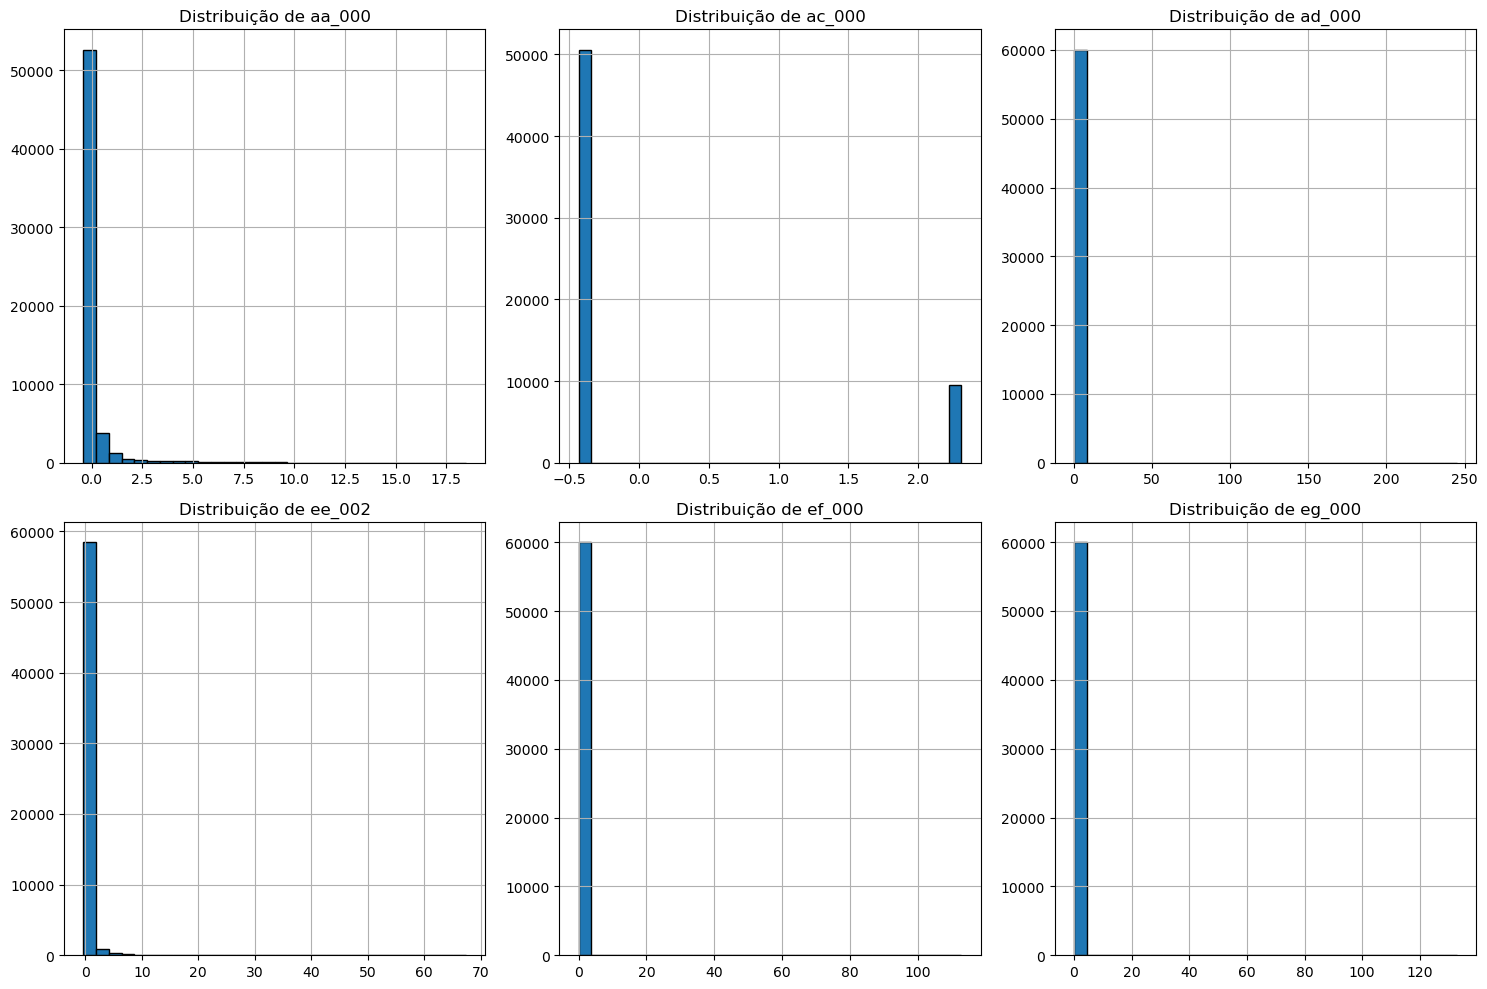

In [28]:
import matplotlib.pyplot as plt

# Selecionar algumas variáveis para visualizar
columns_to_plot = ["aa_000", "ac_000", "ad_000", "ee_002", "ef_000", "eg_000"]

# Criar histogramas das variáveis selecionadas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for col, ax in zip(columns_to_plot, axes.ravel()):
    train_scaled[col].hist(ax=ax, bins=30, edgecolor='black')
    ax.set_title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()


In [30]:
# Converter 'class' para valores numéricos
train_scaled['class'] = train_scaled['class'].map({'neg': 0, 'pos': 1})


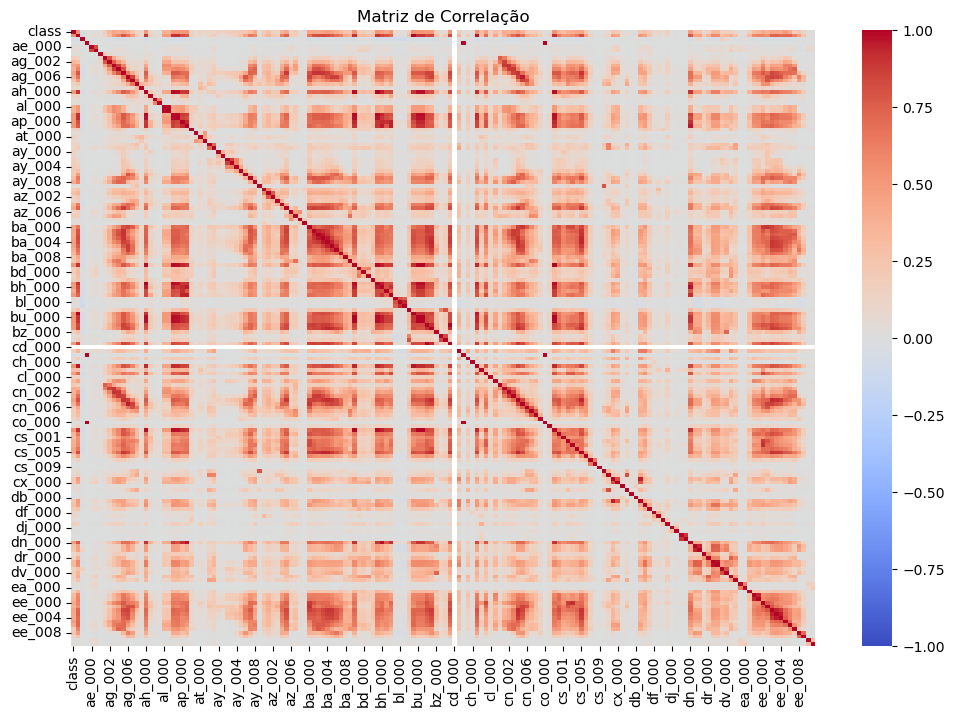

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar matriz de correlação
corr_matrix = train_scaled.corr()

# Exibir o heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", vmax=1, vmin=-1)
plt.title("Matriz de Correlação")
plt.show()


In [32]:
# Ordenar as variáveis mais correlacionadas com 'class'
corr_with_class = corr_matrix["class"].abs().sort_values(ascending=False)
corr_with_class.head(10)  # Mostrar as 10 mais relevantes


class     1.000000
ci_000    0.550386
aa_000    0.536978
bt_000    0.534286
bb_000    0.530738
bv_000    0.529329
bu_000    0.529329
cq_000    0.529329
aq_000    0.519602
bj_000    0.513901
Name: class, dtype: float64

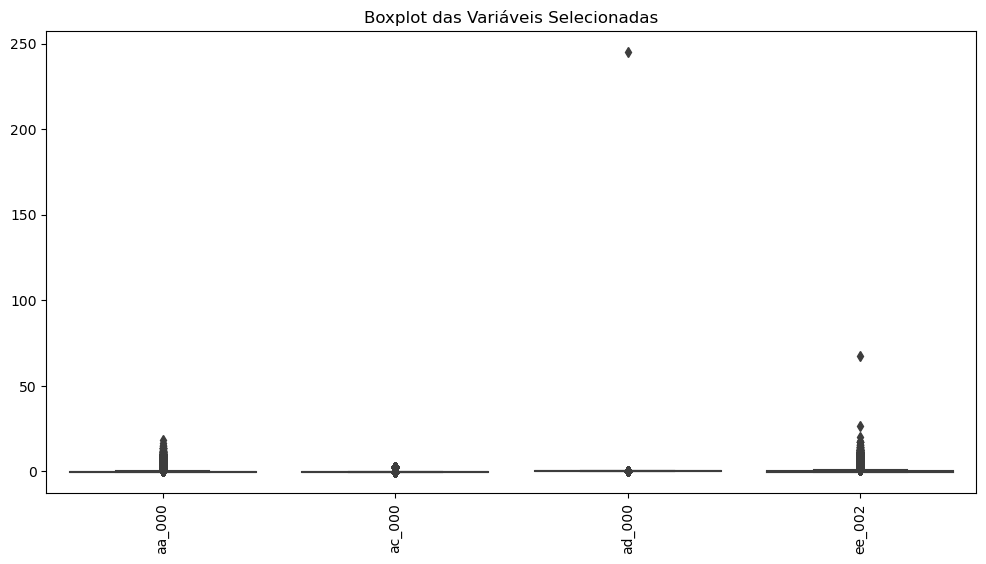

In [33]:
# Boxplot para verificar outliers
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=train_scaled[["aa_000", "ac_000", "ad_000", "ee_002"]])
plt.xticks(rotation=90)
plt.title("Boxplot das Variáveis Selecionadas")
plt.show()


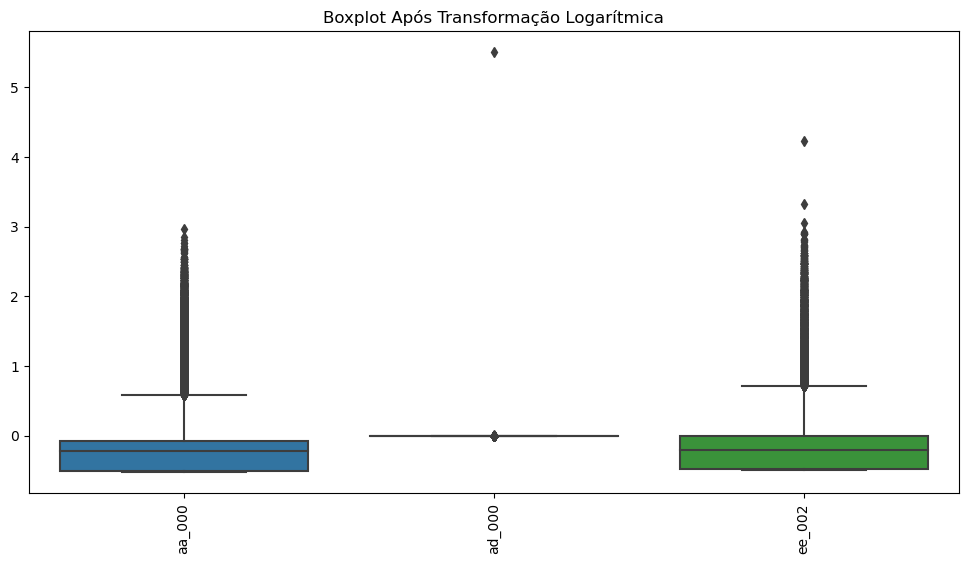

In [34]:
import numpy as np

# Aplicar log(1 + x) para evitar problemas com zero
columns_with_outliers = ["aa_000", "ad_000", "ee_002"]
train_scaled[columns_with_outliers] = np.log1p(train_scaled[columns_with_outliers])

# Exibir um novo boxplot para ver o efeito
plt.figure(figsize=(12,6))
sns.boxplot(data=train_scaled[columns_with_outliers])
plt.xticks(rotation=90)
plt.title("Boxplot Após Transformação Logarítmica")
plt.show()


In [35]:
!pip install imbalanced-learn


In [36]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separar features e rótulo
X = train_scaled.drop(columns=['class'])  # Todas as colunas menos 'class'
y = train_scaled['class']  # Apenas a coluna de classe

# Aplicar SMOTE para aumentar os exemplos da classe minoritária
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Aumentar "pos" para 20% dos dados
X_resampled, y_resampled = smote.fit_resample(X, y)

# Criar um novo DataFrame com os dados balanceados
train_balanced = pd.DataFrame(X_resampled, columns=X.columns)
train_balanced.insert(0, 'class', y_resampled)

# Verificar a nova distribuição das classes
print(train_balanced['class'].value_counts(normalize=True) * 100)


class
0    83.333333
1    16.666667
Name: proportion, dtype: float64


C:\Users\Usuário\AppData\Local\Temp\ipykernel_6296\2087299249.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_balanced.insert(0, 'class', y_resampled)


In [37]:
from sklearn.model_selection import train_test_split

# Separar features e rótulo
X = train_balanced.drop(columns=['class'])
y = train_balanced['class']

# Dividir em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar o tamanho dos conjuntos
print(f"Tamanho do treino: {X_train.shape[0]}")
print(f"Tamanho do teste: {X_test.shape[0]}")


Tamanho do treino: 56640
Tamanho do teste: 14160


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Treinar o modelo
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf.predict(X_test)


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Matriz de Confusão:
[[11725    75]
 [   36  2324]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11800
           1       0.97      0.98      0.98      2360

    accuracy                           0.99     14160
   macro avg       0.98      0.99      0.99     14160
weighted avg       0.99      0.99      0.99     14160



In [40]:
import joblib
joblib.dump(rf, "modelo_random_forest.pkl")


['modelo_random_forest.pkl']